In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
#priklad 1.

last_vectA = np.array([0.5, 0.5])
last_vectB = np.array([1, 0])
last_vectC = np.array([0, 1])
current_vect = np.zeros(2)
valuesA = np.zeros(100)
valuesB = np.zeros(100)
valuesC = np.zeros(100)
valuesA[0] = 0.5
valuesB[0] = 0
valuesC[0] = 1

Q = np.array([[0.8, 0.2], [0.1, 0.9]])

for i in range(1,100):
    #za a)
    current_vect[0] = Q[1, 0] * last_vectA[1] + Q[0, 0] * last_vectA[0]
    current_vect[1] = 1 - current_vect[0]
    valuesA[i] = current_vect[1]
    last_vectA = current_vect.copy()

    #za b)
    current_vect[0] = Q[1, 0] * last_vectB[1] + Q[0, 0] * last_vectB[0]
    current_vect[1] = 1 - current_vect[0]
    valuesB[i] = current_vect[1]
    last_vectB = current_vect.copy()

    #za c)
    current_vect[0] = Q[1, 0] * last_vectC[1] + Q[0, 0] * last_vectC[0]
    current_vect[1] = 1 - current_vect[0]
    valuesC[i] = current_vect[1]
    last_vectC = current_vect.copy()

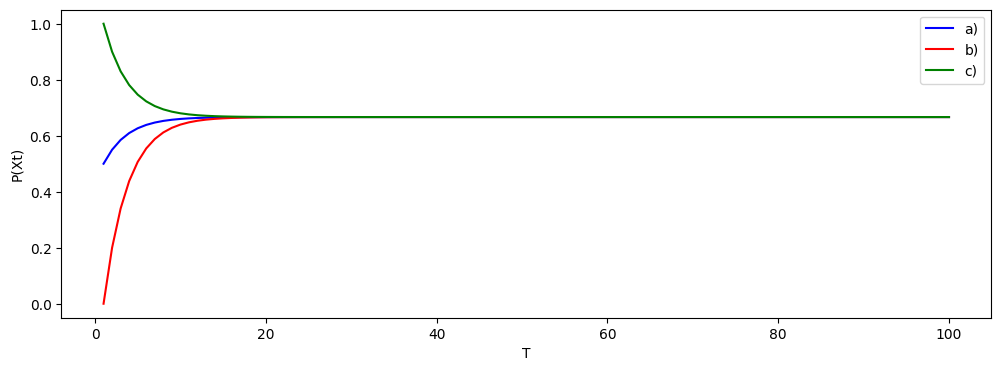

In [19]:
x = range(1, 101)

plt.figure(figsize=(12, 4))

plt.plot(x, valuesA, label="a)", color="blue")
plt.plot(x, valuesB, label="b)", color="red")
plt.plot(x, valuesC, label="c)", color="green")

plt.xlabel("T")
plt.ylabel("P(Xt)")
plt.legend()

plt.show()

In [ ]:
#Priklad 2.conjugate

from scipy.stats import poisson
mol = np.load("y.npy")

values = np.zeros(100)

for i in range(100):
    numerator = 1
    denominator = 1
    for j in range(i+1):
        numerator *= poisson.pmf(mol[j], 55)
    numerator *= valuesA[i]   #pouzivam hodnoty pravdepodobnosti aktivovaneho genu z vektoru z prikladu 1
    for l in range(i+1):
        denominator *= poisson.pmf(mol[l], 40)
    denominator *= (1 - valuesA[i])
    denominator += numerator

    values[i] = numerator/denominator


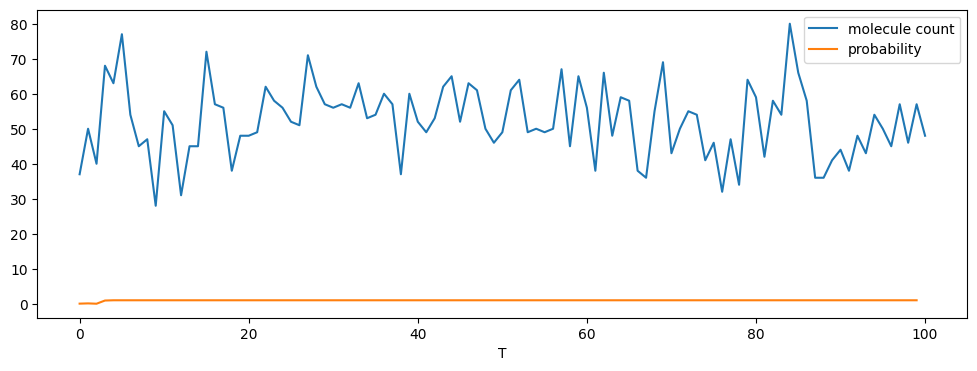

In [ ]:
#oba grafy

plt.figure(figsize=(12, 4))
plt.plot(range(101), mol, label="molecule count")
plt.plot(range(100), values, label="probability")

plt.xlabel("T")
plt.legend()

plt.show()

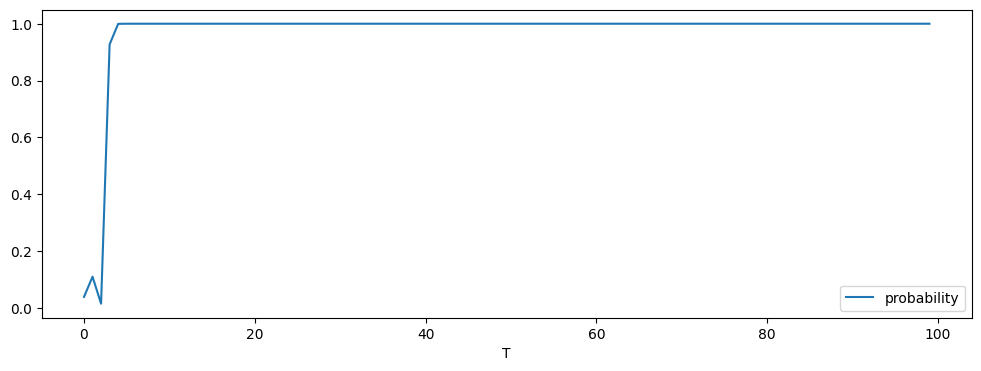

In [24]:
#Jen pravdepodobnost pro presnost

plt.figure(figsize=(12, 4))
plt.plot(range(100), values, label="probability", color="orange")

plt.xlabel("T")
plt.legend()

plt.show()